In [2]:
# ##################
# package imports
# ##################

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# this allows plots to appear directly in the notebook
%matplotlib inline

In [111]:
# ##################
# Load the early morning (12AM-3 AM local time) data
# ##################

earlymorning_cabrides_2011_2014 = pd.read_csv("/Users/pfagan/Downloads/project/earlymorning_cabrides.csv", \
                   dtype={'dt': str, 'card_no_tip': np.int64, 'card_with_tip': np.int64}\
                  )

In [112]:
earlymorning_cabrides_2011_2014.shape

(1462, 3)

In [113]:
earlymorning_cabrides_2011_2014.head(2)

,dt,card_no_tip,card_with_tip
0,2011-08-28,0,7
1,2012-10-30,2,124


In [114]:
def calc_ratio(num1, num2):
    '''
    This function is used to calculate the percentage of cash rides (ratio between two numbers)
    (num1: FLOAT, num2: FLOAT) => result: FLOAT
    ex: calc_ratio(3.5, 20.0) == 17.5
    '''

    try:
        result = 100*(num1/num2)
    except ZeroDivisionError:
        print("Divide by zero error. Remove records where denominator = 0")
    else:
        return result

In [115]:
# ##########
# check on the function
# #########

t = 3.5
f = 20

calc_ratio(t,f)


17.5

In [116]:
# ###########
# calculate the percentage of cash rides to non-cash rides
# ###########

earlymorning_cabrides_2011_2014['tip_ratio'] = earlymorning_cabrides_2011_2014.apply(lambda row: \
                                        calc_ratio(row['card_no_tip'],row['card_with_tip']), axis = 1)


In [117]:
earlymorning_cabrides_2011_2014.head(5)

,dt,card_no_tip,card_with_tip,tip_ratio
0,2011-08-28,0,7,0.000000
1,2012-10-30,2,124,1.612903
2,2011-01-02,18,501,3.592814
3,2011-01-27,20,1391,1.437815
4,2014-01-03,25,1017,2.458210


In [118]:
earlymorning_cabrides_2011_2014.describe()

,card_no_tip,card_with_tip,tip_ratio
count,1462.000000,1462.000000,1462.000000
mean,114.491792,4476.270178,2.867641
std,47.935799,1566.510360,1.566745
min,0.000000,7.000000,0.000000
25%,82.000000,3524.000000,1.763365
50%,104.000000,4370.500000,2.194383
75%,134.000000,5091.750000,3.837634
max,331.000000,8307.000000,8.909795


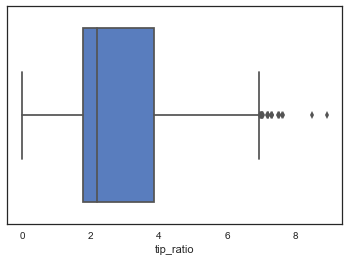

In [119]:
# ##################
# create a boxplot to check for outliers
# ##################

ax = sns.boxplot(x=earlymorning_cabrides_2011_2014["tip_ratio"])

In [120]:
# ##################
# check the skewness
# ##################

earlymorning_cabrides_2011_2014["tip_ratio"].skew()

1.1756372908176362

In [121]:
# ##################
# calculate the 99% percentile value for the tip_ratio value
# ##################

q99a = earlymorning_cabrides_2011_2014["tip_ratio"].quantile(0.99) # 7.03
print(q99a)

7.032829660229856


In [122]:
# ##################
# remove the outliers
# ##################

earlymorning_cabrides_2011_2014_v2 = earlymorning_cabrides_2011_2014 \
                                   [earlymorning_cabrides_2011_2014["tip_ratio"] < q99a]

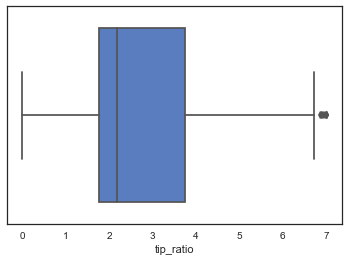

In [123]:
# ##################
# create a boxplot to check for outliers
# ##################

ax2 = sns.boxplot(x=earlymorning_cabrides_2011_2014_v2["tip_ratio"])

In [124]:
# ##################
# the skewness issue has been resolved
# ##################

earlymorning_cabrides_2011_2014_v2["tip_ratio"].skew()

1.12844391168659

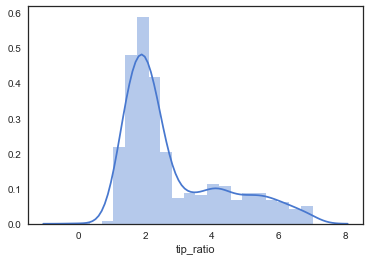

In [125]:
# ##################
# create a histogram of the data
# ##################

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.distplot(earlymorning_cabrides_2011_2014_v2["tip_ratio"], hist=True ) 

In [126]:
earlymorning_cabrides_2011_2014_v2["tip_ratio"].describe()

count    1447.000000
mean        2.819412
std         1.500241
min         0.000000
25%         1.757237
50%         2.185445
75%         3.744168
max         7.020598
Name: tip_ratio, dtype: float64

In [72]:
# ##################
# Load the late morning (9 AM-12 PM local time) data
# ##################

latemorning_cabrides_2011_2014 = pd.read_csv("/Users/pfagan/Downloads/project/latemorning_cabrides.csv", \
                   dtype={'dt': str, 'card_no_tip': np.int64, 'card_with_tip': np.int64}\
                  )

In [73]:
latemorning_cabrides_2011_2014.shape

(1462, 3)

In [74]:
latemorning_cabrides_2011_2014.head(2)

,dt,card_no_tip,card_with_tip
0,2011-01-01,25,2035
1,2011-01-02,39,2370


In [80]:
# ###########
# calculate the tip to fare ratio
# ###########

latemorning_cabrides_2011_2014['tip_ratio'] = latemorning_cabrides_2011_2014.apply(lambda row: \
                                        calc_ratio(row['card_no_tip'],row['card_with_tip']), axis = 1)


In [81]:
latemorning_cabrides_2011_2014.tail(5)

,dt,card_no_tip,card_with_tip,cash_ratio,tip_ratio
1457,2014-12-28,181,5663,3.196186,3.196186
1458,2014-12-29,222,5749,3.861541,3.861541
1459,2014-12-30,261,6621,3.942003,3.942003
1460,2014-12-31,280,8069,3.470071,3.470071
1461,2015-01-01,213,6577,3.238559,3.238559


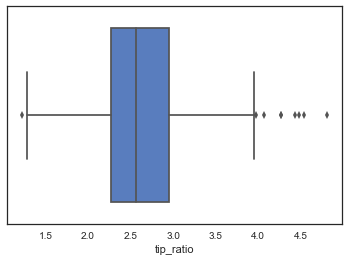

In [84]:
# ##################
# create a boxplot to check for outliers
# ##################

ax1 = sns.boxplot(x=latemorning_cabrides_2011_2014["tip_ratio"])

In [85]:
# ##################
# check the skewness
# ##################

latemorning_cabrides_2011_2014["tip_ratio"].skew()

0.4011799743850015

In [88]:
# ##################
# calculate the 99% percentile value for the tip_ratio value
# ##################

q99b = latemorning_cabrides_2011_2014["tip_ratio"].quantile(0.99) # 6.02
print(q99b)

3.820682152011146


In [89]:
# ##################
# remove the outliers
# ##################

latemorning_cabrides_2011_2014_v2 = latemorning_cabrides_2011_2014\
                                     [latemorning_cabrides_2011_2014["tip_ratio"] < q99b]

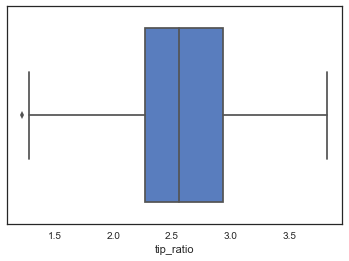

In [91]:
# ##################
# create a boxplot to check for outliers
# ##################

ax2 = sns.boxplot(x=latemorning_cabrides_2011_2014_v2["tip_ratio"])

In [92]:
# ##################
# check the skewness
# ##################

latemorning_cabrides_2011_2014_v2["tip_ratio"].skew()

0.18047373404489558

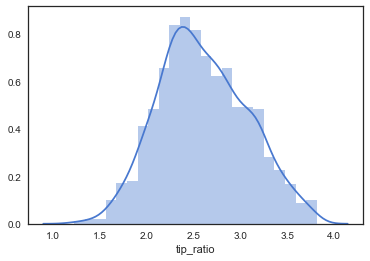

In [93]:
# ##################
# create a histogram of the data
# ##################

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.distplot(latemorning_cabrides_2011_2014_v2["tip_ratio"], hist=True ) 

In [128]:
earlymorning_cabrides_2011_2014_v2["tip_ratio"].describe()

count    1447.000000
mean        2.819412
std         1.500241
min         0.000000
25%         1.757237
50%         2.185445
75%         3.744168
max         7.020598
Name: tip_ratio, dtype: float64

In [94]:
latemorning_cabrides_2011_2014_v2["tip_ratio"].describe()

count    1447.000000
mean        2.602116
std         0.473757
min         1.228501
25%         2.271167
50%         2.555296
75%         2.933287
max         3.814757
Name: tip_ratio, dtype: float64

***For early morning rides, the tip_ratio mean is 2.82 and the standard deviation is 1.5 
For late morning, the tip_ratio mean is 2.6 and the standard deviation is 0.47***

***To test the null hypothesis that the means are the same between the two groups, we will use a 
T-test. The alternative hypothesis is that the means between the two groups are different. The alpha 
value for this test is 0.01***

***One of the assumptions of the T-test is that the groups are from a normal distribution.
This has been checked. Because the standard deviations between the two groups differ by one 
order of magnitude, we will assume that the T-test should be conducted with unequal variances.
The other assumption is that the two populations are independent, which should be the case with cab rides
from independent, random people.***

In [127]:
# ##################
# run the T-test to get the T statistic and the associated p-value.
# ##################

stats.ttest_ind(earlymorning_cabrides_2011_2014_v2["tip_ratio"], \
                latemorning_cabrides_2011_2014_v2["tip_ratio"], \
                equal_var = False)

Ttest_indResult(statistic=5.253910189185789, pvalue=1.673270031599623e-07)

**RESULTS**

***T-statistic = 5.254. p-value = 1.67e-07.***

***Based on the results of the T-test, where the listed p-value is > the alpha value (0.01) 
we would reject the null hypothesis that the means between the two populations are same.***